**Replace Missing Values** - there are various methodologies how to replace missing values: mean, median, mode, standard deviation, min & max,ffill (forward fill - fill with next value), bfill (backward filling - fill with previous value), interpolate, KNN Imputer, XGboost, logistic regression, MICE (mice forest), ...


Each methodology is suitable for different purpose.

**Markenwert Mio EUR** - Brand Value in Million EUR. Column has approximately 50% NaN missing values. I have tested mean, median, Mode, std, bfil,ffill, random forest, MICE. Random forest is suitable, MICE is better than random forest. ( XGboost, KNNs, and many other regressions are to be tested later on).











In [1]:
# install the needed libraries
!pip install matplotlib plotly scikit-learn numpy miceforest

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.7 MB/s eta 0:00:00


In [2]:
# import the needed libraries
import os
import scipy.ndimage
import scipy.stats
import plotly.express as px
import miceforest as mf
import xgboost as xgb
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from matplotlib.colors import ListedColormap
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets, ensemble, model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython import display
from pandas import read_excel
np.bool = np.bool_
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 191)
%matplotlib inline

In [3]:
# importing or loading the dataset
y_sheet = 'List' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = 'DE_Mode_3.xlsx' # change it to the name of your excel file
df = read_excel(file_name, sheet_name = y_sheet)

In [ ]:
df.count()

,0
Mitarbeiter 2025,131
Grosse,131
Marke,131
Markenwert Mio EUR,57
Gegründet,131
Stadt,131
Land,131
Umsatz 2024 Mio EUR,131
Umsatz per Mitarbeiter,131
Filialen,131


In [ ]:
# revise that all columns are numerical
print (df.dtypes)

Mitarbeiter 2025             int64
Grosse                      object
Marke                       object
Markenwert Mio EUR         float64
Gegründet                    int64
Stadt                       object
Land                        object
Umsatz 2024 Mio EUR          int64
Umsatz per Mitarbeiter     float64
Filialen                     int64
Mitarbeiter per Filiale    float64
CEO 2025                    object
Website                     object
Unnamed: 13                 object
mean                       float64
ffill                      float64
bfill                      float64
interpolate                float64
dtype: object


In [ ]:
print(df)

In [ ]:
# convert (encode) object type to numerical
#labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
#df['Grosse'] = labelencoder.fit_transform(df['Grosse']) #transform column
#df['Marke'] = labelencoder.fit_transform(df['Marke']) #transform column
#df['Stadt'] = labelencoder.fit_transform(df['Stadt']) #transform column
#df['Land'] = labelencoder.fit_transform(df['Land']) #transform column
#df['CEO 2025'] = labelencoder.fit_transform(df['CEO 2025']) #transform column
#df['Website'] = labelencoder.fit_transform(df['Website']) #transform column

In [4]:
# replace missing values of the column "Markenwert Mio EUR"
# A - basic approaches do not reflect reality:

# 1. mean
df['mean'] = df['Markenwert Mio EUR'].fillna(df['Markenwert Mio EUR'].mean())
# 2. ffill
df['ffill'] =df['Markenwert Mio EUR'].fillna(method='pad')
# 3. bfill
df['bfill'] =df['Markenwert Mio EUR'].fillna(method='bfill')
# 4. interpolate
df['interpolate'] =df['Markenwert Mio EUR'].interpolate(method ='linear', limit_direction ='forward')



/tmp/ipython-input-4-3872566347.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['ffill'] =df['Markenwert Mio EUR'].fillna(method='pad')
/tmp/ipython-input-4-3872566347.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['bfill'] =df['Markenwert Mio EUR'].fillna(method='bfill')


In [ ]:
print(df)

     Mitarbeiter 2025  Grosse  Marke  Markenwert Mio EUR  Gegründet  Stadt  \
0                1400       1      0                 NaN       2014     36   
1               59000       3      1             18000.0       1949     40   
2                  50       4      2                 NaN       1994     53   
3              204891       5      3             70000.0       1999     88   
4                5000       0      4            262000.0       2010     88   
5                2700       1      5              8990.0       1999     66   
6             1556000       5      6           2066000.0       1994     74   
7                7300       0      7              1800.0       1975     49   
8                3000       1      8                 NaN       2000     46   
9                 200       4      9                 NaN       2020     10   
10               1600       1     10                 NaN       1851     80   
11                235       4     11                 NaN       1

In [ ]:
# df.isna().sum()

,0
Mitarbeiter 2025,0
Grosse,0
Marke,0
Markenwert Mio EUR,74
Gegründet,0
Stadt,0
Land,0
Umsatz 2024 Mio EUR,0
Umsatz per Mitarbeiter,0
Filialen,0


In [5]:
# choose few brands to compare the methodologies of replacing missing values
filtered_df = df[df['Marke'].isin(['Marks Spencer','Mister Lady','kik', 'Takko'])]

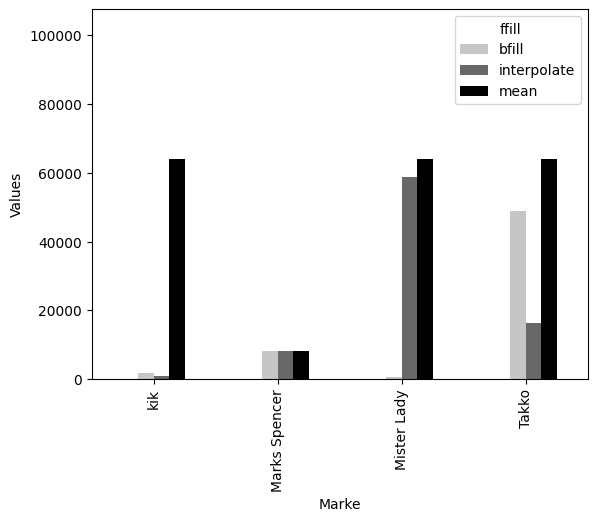

In [6]:
# Marks Spencer Markenwert Mio EUR was provided, methodologies mean, bfill, ffill and interpolate are not good to calculate missing values
filtered_df.plot(x="Marke", y=["ffill","bfill","interpolate","mean"], kind="bar", cmap='Greys')
plt.ylabel("Values");
plt.show()

In [ ]:
# replace missing values of the column "Markenwert Mio EUR"
# B - advanced ML approaches
# 1 Random Forest
# 2 MICE (mice forest)
# 3 logistic regression
# 4 KNN
# 5 XGboost

In [7]:
# 1 Random Forest
# features must be numerical (convert to numerical those which would be categorical), 'Markenwert Mio EUR' is not present
Features = ['Mitarbeiter 2025','Umsatz 2024 Mio EUR', 'Filialen']

In [8]:
Trainset = df[pd.isnull(df['Markenwert Mio EUR']) == False]
Testset = df[pd.isnull(df['Markenwert Mio EUR'])]
# code
print(Trainset.shape, Testset.shape)

(57, 18) (74, 18)


In [9]:
rf_Markenwert = RandomForestRegressor()
# Training
rf_Markenwert.fit(Trainset[Features], Trainset['Markenwert Mio EUR'])

RandomForestRegressor()

In [10]:
# Predicting missing 'Age' values in the test set
# values are too close to each other and not predicted well
Predicted_Markenwert = rf_Markenwert.predict(Testset[Features])
Predicted_Markenwert

array([ 14973.04, 102971.2 ,  19415.44, 102971.2 ,  65960.63, 102971.2 ,
         3702.5 ,   4886.5 ,  24240.48,  65974.13,  24175.08,   4718.4 ,
         2117.65,  45148.5 ,   2490.47,   3886.64, 102971.2 ,  47594.73,
        16830.18, 176274.  ,  45164.  ,   7342.16,  45241.  , 102971.2 ,
        24064.33, 144885.6 , 102971.2 ,   9626.42,   6032.56, 102971.2 ,
       102971.2 ,  47594.73,   3797.57,  66148.25,   2326.68,  53505.09,
       176274.  ,  66078.43,  24694.22,  66400.73,  45049.87, 102971.2 ,
         3741.3 ,   2695.17, 102971.2 ,  95418.19,  24010.3 , 102971.2 ,
        45133.77,   2056.38,   3639.26, 102971.2 ,   7556.08,  23005.96,
       123983.6 , 131808.03,  47653.39,  67895.17,  23258.73,   3924.74,
         2096.62,   2704.24,  52933.09,  31875.07,  19949.18,   2493.64,
        14855.78,  66849.39, 102971.2 , 123960.6 ,  47540.7 ,   2005.16,
        23996.2 ,  23931.8 ])

In [11]:
#Testset['Markenwert Mio EUR'] = Predicted_Markenwert.astype(int)
Testset['rf'] = Predicted_Markenwert.astype(int)
# Predicted missing 'Markenwert Mio EUR' values are available in column filled
Testset.head()

/tmp/ipython-input-11-3784607250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Testset['rf'] = Predicted_Markenwert.astype(int)


,Mitarbeiter 2025,Grosse,Marke,Markenwert Mio EUR,Gegründet,Stadt,Land,Umsatz 2024 Mio EUR,Umsatz per Mitarbeiter,Filialen,Mitarbeiter per Filiale,CEO 2025,Website,Unnamed: 13,mean,ffill,bfill,interpolate,rf
0,1400,M,About you,NaN,2014,Hamburg,DE,2000,1.428571,1,1400.0,Tarek Müller,www.aboutyou.com,NaN,63956.947368,NaN,18000.0,NaN,14973
2,50,XS,Akronym,NaN,1994,Munich,DE,5,0.100000,1,50.0,Michaela Sachenbacher,https://acrnm.com/,NaN,63956.947368,18000.0,70000.0,44000.0,102971
8,3000,M,Asos,NaN,2000,London,UK,3360,1.120000,1,3000.0,Jose Calamonte,https://www.asos.com/,NaN,63956.947368,1800.0,33.0,1446.6,19415
9,200,XS,Avenir,NaN,2020,Berlin,DE,4,0.020000,1,200.0,Sophie Claussen,https://avenirberlin.de/,NaN,63956.947368,1800.0,33.0,1093.2,102971
10,1600,M,Bally,NaN,1851,Tessin,CH,325,0.203125,160,10.0,Ennio Fontana,https://www.bally.com/,NaN,63956.947368,1800.0,33.0,739.8,65960


In [ ]:
Testset.isnull().sum()

,0
Mitarbeiter 2025,0
Grosse,0
Marke,0
Markenwert Mio EUR,0
Gegründet,0
Stadt,0
Land,0
Umsatz 2024 Mio EUR,0
Umsatz per Mitarbeiter,0
Filialen,0


In [12]:
# choose few brands with originally missing values to compare the methodologies of replacing missing values
filtered_df2 = Testset[Testset['Marke'].isin(['Mister Lady','Tom Tailor','Woolworth','kik', 'Takko','NKD'])]

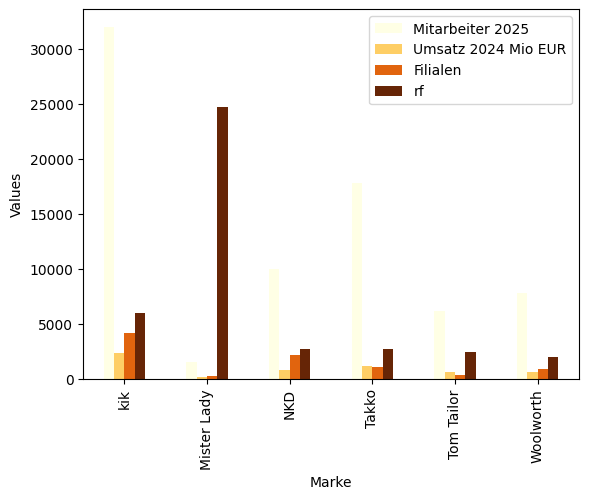

In [14]:
# Random Forest (deep brown color Markenwert Mio EUR) seems to be suitable
filtered_df2.plot(x="Marke", y=["Mitarbeiter 2025","Umsatz 2024 Mio EUR", "Filialen","rf"], kind="bar", cmap='YlOrBr')
plt.ylabel("Values");
plt.show()

In [ ]:
# print all inputed lines
print(Trainset.head(140))

     Mitarbeiter 2025 Grosse           Marke  Markenwert Mio EUR  Gegründet  \
1               59000     XL          Adidas             18000.0       1949   
3              204891    XXL         Alibaba             70000.0       1999   
4                5000      L      Aliexpress            262000.0       2010   
5                2700      M         Allegro              8990.0       1999   
6             1556000    XXL          Amazon           2066000.0       1994   
7                7300      L          Armani              1800.0       1975   
12               1550      M        Benetton                33.0       1965   
15                788      S          Bogner               610.0       1932   
17               4000      M  Bottega Veneta              1700.0       1966   
20               9336      L        Burberry              4200.0       1856   
21              31000     XL             C&A              2750.0       1841   
24              32000     XL          Chanel        

In [ ]:
# replace missing values of the column "Markenwert Mio EUR"
# B - advanced ML approaches
# 2 MICE (mice forest)

In [15]:
df_train = df.loc[:, ["Markenwert Mio EUR","Mitarbeiter 2025","Umsatz 2024 Mio EUR", "Filialen"]]
df_train.head()

,Markenwert Mio EUR,Mitarbeiter 2025,Umsatz 2024 Mio EUR,Filialen
0,NaN,1400,2000,1
1,18000.0,59000,23680,1863
2,NaN,50,5,1
3,70000.0,204891,128611,1
4,262000.0,5000,224,1


In [16]:
# Create kernel.
kds = mf.ImputationKernel(
  df_train,
  random_state=100
)
# Run the MICE algorithm for 2 iterations
kds.mice(2)
# Return the completed dataset.
df_imputed = kds.complete_data()

In [17]:
df_imputed.head()

,Markenwert Mio EUR,Mitarbeiter 2025,Umsatz 2024 Mio EUR,Filialen
0,49000.0,1400,2000,1
1,18000.0,59000,23680,1863
2,98000.0,50,5,1
3,70000.0,204891,128611,1
4,262000.0,5000,224,1


In [18]:
# return to the beginning of this notebook and create another column with imputed MICE values
filtered_df2['MICE'] = df_imputed['Markenwert Mio EUR']

/tmp/ipython-input-18-2724501243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['MICE'] = df_imputed['Markenwert Mio EUR']


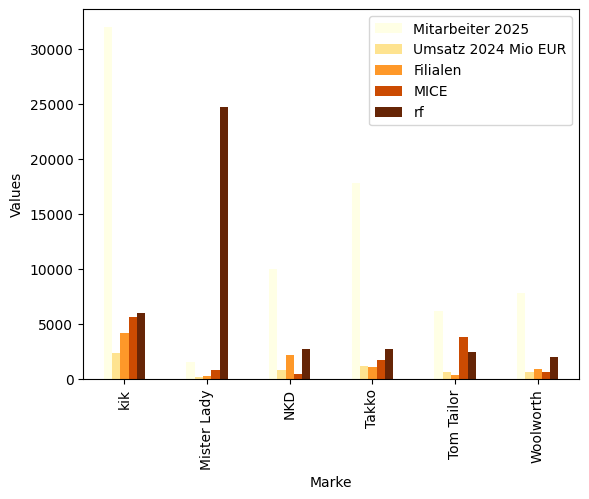

In [20]:
# MICE imputation (Markenwert Mio EUR) is suitable
filtered_df2.plot(x="Marke", y=["Mitarbeiter 2025","Umsatz 2024 Mio EUR", "Filialen","MICE","rf"], kind="bar", cmap='YlOrBr')
plt.ylabel("Values");
plt.show()